# Performance of an Asset Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [8]:
portifolio = pd.read_excel('Carteira.xlsx')
portifolio = portifolio[~portifolio['Ativos'].isin(['GNDI3'])] # take GNDI3 off the df
display(portifolio)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
9,NTCO3,Ação,100
10,BCRI11,FII,100


### Portfolio asset quotes dataframe

In [9]:
portifolio_prices = pd.DataFrame() # empty dataframe

for asset in portifolio['Ativos']:
    portifolio_prices[asset] = web.DataReader('{}.SA'.format(asset), data_source = 'yahoo', start = '2020-01-01', end = '2020-11-10')['Adj Close']

display(portifolio_prices)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,25.766632,35.588451,10.9650,17.875835,18.235775,38.093487,121.393974,145.833633,194.702957,NaN
2020-01-03,113.800003,140.899994,11.922435,25.779667,35.214130,11.0675,18.350576,18.288694,40.747009,122.846581,143.876160,194.702957,NaN
2020-01-06,112.589996,139.100006,11.932190,25.319189,34.690079,11.3500,18.418335,18.262232,39.882378,121.884590,145.403000,193.122696,NaN
2020-01-07,112.239998,139.399994,11.898048,24.879337,33.885296,11.2650,18.381573,18.335096,40.528366,122.048126,140.773514,193.873810,NaN
2020-01-08,111.949997,138.199997,12.263843,24.494461,33.333179,11.2125,18.473478,18.172602,40.737072,119.835548,136.506165,182.899796,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.801657,23.926962,14.4000,17.039717,18.344759,47.375851,103.414307,124.271797,154.494263,124.111862
2020-11-05,96.949997,115.900002,27.401571,16.046162,24.491638,14.6775,18.032324,19.155306,49.969746,103.414307,125.651840,154.299164,124.403519
2020-11-06,97.190002,117.510002,27.281780,16.007959,24.462921,14.7925,18.592960,19.365269,50.317589,103.270012,125.309273,154.552780,126.386833


### Check if data is correct

In [13]:
portifolio_prices.info()
#XPLG11 has missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


### Tuning data

In [16]:
# Fill with the mean
# df_mean = portifolio_prices.mean()
# portifolio_prices = portifolio_prices.fillna(df_mean)
# or Fill with the previous value
portifolio_prices = portifolio_prices.ffill()
portifolio_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  215 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


### Normalized prices

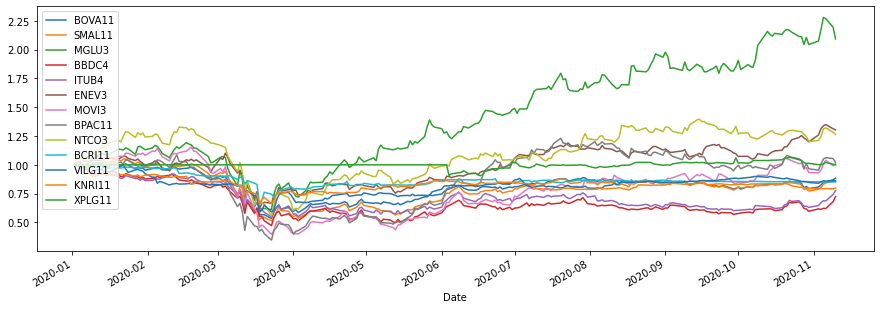

In [18]:
norm_portifolio = portifolio_prices/portifolio_prices.iloc[0]
norm_portifolio.plot(figsize = (15,5))
plt.legend(loc = 'upper left')

### Compare with IBOV

In [19]:
ibov_price = web.DataReader('^BVSP', data_source = 'yahoo', start = '2020-01-01', end = '2020-11-10')
display(ibov_price)

#Ibovespa Index (IBOV) is the most important indicator of the average performance of the quotations of shares traded on B3 - Brasil, Bolsa, Balcão. It is made up of the stocks with the highest volume traded in recent months.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-04,98296,95987,95992,97811,10704600,97811
2020-11-05,100922,97872,97873,100774,10455300,100774
2020-11-06,100928,99837,100751,100799,8382800,100799


In [21]:
# Amount invested
amount_invested = pd.DataFrame() # empty dataframe

# For each asset I created a column with the amount invested in it (price * quantity)
for asset in portifolio['Ativos']:
    amount_invested[asset] = portifolio_prices[asset] * portifolio.loc[portifolio['Ativos']==asset, 'Qtde'].values[0]
display(amount_invested)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.735565,2576.663208,3558.845139,3289.500046,1787.583542,1823.577499,3809.348679,12139.397430,14583.363342,19470.295715,12378.935741
2020-01-03,11380.000305,14089.999390,11922.434807,2577.966690,3521.413040,3320.250034,1835.057640,1828.869438,4074.700928,12284.658051,14387.615967,19470.295715,12378.935741
2020-01-06,11258.999634,13910.000610,11932.189941,2531.918907,3469.007874,3405.000114,1841.833496,1826.223183,3988.237762,12188.459015,14540.299988,19312.269592,12378.935741
2020-01-07,11223.999786,13939.999390,11898.048401,2487.933731,3388.529587,3379.500103,1838.157272,1833.509636,4052.836609,12204.812622,14077.351379,19387.380981,12378.935741
2020-01-08,11194.999695,13819.999695,12263.842583,2449.446106,3333.317947,3363.749886,1847.347832,1817.260170,4073.707199,11983.554840,13650.616455,18289.979553,12378.935741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1580.165672,2392.696190,4319.999886,1703.971672,1834.475899,4737.585068,10341.430664,12427.179718,15449.426270,12411.186218
2020-11-05,9694.999695,11590.000153,27401.571274,1604.616165,2449.163818,4403.249931,1803.232384,1915.530586,4996.974564,10341.430664,12565.184021,15429.916382,12440.351868
2020-11-06,9719.000244,11751.000214,27281.780243,1600.795937,2446.292114,4437.749863,1859.296036,1936.526871,5031.758881,10327.001190,12530.927277,15455.278015,12638.683319


In [23]:
# Amount Invested
amount_invested['Total'] = amount_invested.sum(axis = 1) # sum of row values

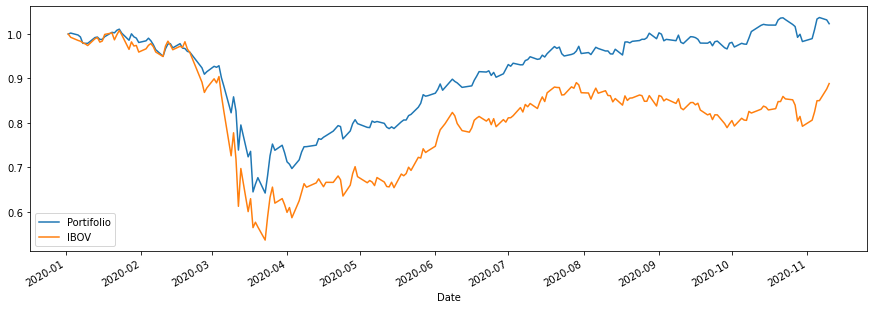

In [27]:
# Comparison of the portfolio with the IBOV
amount_invested_norm = amount_invested / amount_invested.iloc[0]
ibov_price_norm = ibov_price / ibov_price.iloc[0]

amount_invested_norm['Total'].plot(figsize=(15,5), label= 'Portifolio')
ibov_price_norm['Adj Close'].plot(figsize=(15,5), label = 'IBOV')
plt.legend()
plt.show()

In [31]:
# Portfolio Return
portfolio_return = amount_invested['Total'][-1] / amount_invested['Total'][0] - 1 
ibov_return = ibov_price['Adj Close'][-1] / ibov_price['Adj Close'][0] - 1
print('Portfolio return: {:.2%}'.format(portfolio_return))
print('IBOV return: {:.2%}'.format(ibov_return))

Portfolio return: 2.33%
IBOV return: -11.15%


### Correlation portfolio and IBOV

In [34]:
correlation = amount_invested['Total'].corr(ibov_price['Adj Close'])
print(correlation)

# Strong correlation

0.8730400638399892
